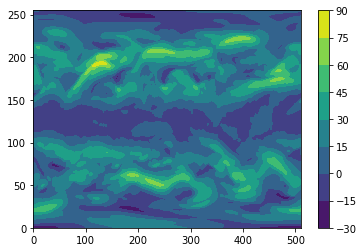

In [3]:
# The data are located on COLA computers here: /shared/working/rean/era-interim/daily/data/yyyy/ei.oper.an.pl.regn128cm.yyyymmddhh 
# Plot of Zonal winds, 2015, November, 0600 UTC.
# geopotential height 300 hPa
# data type is GRIB (gridded binary)
# ERA-Interim Reanalysis Datase
import warnings
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
path ='/shared/working/rean/era-interim/daily/data/2015/'
fname ='ei.oper.an.pl.regn128cm.2015110600'
ds=xr.open_dataset(path+fname,engine='cfgrib',backend_kwargs={'indexpath': ''})
ds
ds_z300=ds.sel(isobaricInhPa=300)
ds_z300
ds_z300=ds.sel(isobaricInhPa=300)
ds_z300
plt.contourf(ds_z300['u'])
plt.colorbar()


Text(0.5, 1.0, 'Zonal winds plot, date = 2015110600')

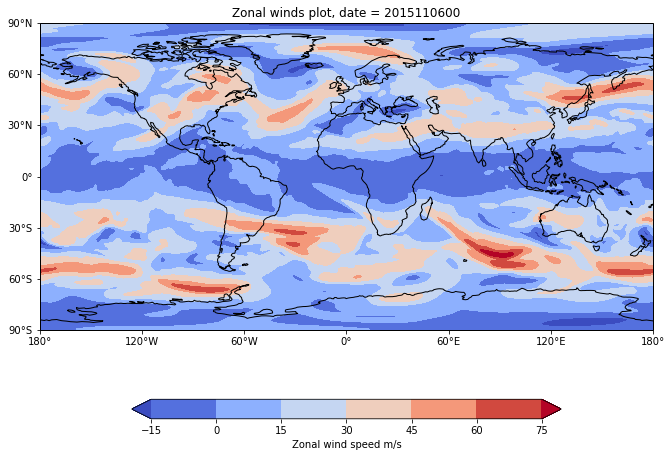

In [6]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data

data = ds_z300['u']
data, lons = add_cyclic_point(data, coord=ds['longitude'])


# Make a filled contour plot
cs=ax.contourf(lons, ds['latitude'], data,
            transform = ccrs.PlateCarree(),cmap='coolwarm',extend='both')

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
#cbar = plt.colorbar(cs)

cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Zonal wind speed m/s')
plt.title('Zonal winds plot, date = 2015110600')